# Practice Session 01+02: Data preparation

<font size="+2" color="navy">Additional results: model purchased device</font>

Author: <font color="blue">Marcel Fernández Serrano</font>

E-mail: <font color="blue">marcel.fernandez02@estudiant.upf.edu</font>

Date: <font color="blue">06/10/2023</font>

# 1. Exploratory data analysis 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import sklearn

from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [2]:
# We read the csv doc
input_dataset = pd.read_csv("device_db.csv", sep=",")

## 1.1. Data types and simple statistics

In [3]:
input_dataset.head()

,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,DEVICE_COST_MONTH_3,DEVICE_COST_MONTH_4,DEVICE_COST_MONTH_5,DEVICE_COST_MONTH_6,LINE_ACTIVATION_DATE,MONTHS_LAST_DEVICE,DURATION_LINE,PREVIOUS_DEVICE_MODEL,PREVIOUS_DEVICE_MANUF,PREVIOUS_DEVICE_BRAND
0,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,393.0,NaN,465.24673,530.80615,530.80615,781.12646,398.99377,1169.39610,47.50000,...,12.0,12.0,12.0,12.0,20041220.0,NaN,172.0,Moto G4 Plus,"Motorola Mobility LLC, a Lenovo Company",Motorola
1,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,20170401.0,232.24121,272.25525,272.25525,704.88519,412.71664,365.14441,3.70000,...,0.0,0.0,0.0,0.0,20170405.0,20.0,20.0,Samsung Galaxy J1 Mini,Samsung Korea,Samsung
2,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,875.0,NaN,484.62036,264.13843,264.13843,348.50073,380.44156,250.73566,26.10000,...,0.0,0.0,0.0,0.0,20040412.0,NaN,176.0,Moto E (2ª Geração),"Motorola Mobility LLC, a Lenovo Company",Motorola
3,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,20171001.0,4255.46040,836.11707,836.11707,691.55640,146.76660,302.49249,175.70000,...,6.0,6.0,6.0,6.0,20110825.0,14.0,88.0,iPhone 6,Apple Inc,Apple
4,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,609.0,20190101.0,5014.10300,2659.05150,2659.05150,2435.03930,2053.97950,1553.11500,383.89999,...,0.0,0.0,0.0,0.0,20140617.0,-1.0,54.0,K10a40,"Motorola Mobility LLC, a Lenovo Company",Outros


In [4]:
column_type = []
df = pd.DataFrame(input_dataset)

for column in df.columns:
    column_type.append({'name':column,'type':df[column].dtype, 'number_of_unique':df[column].nunique()})
    
column_type_df = pd.DataFrame(column_type, columns=['name', 'type', 'number_of_unique'])
display(column_type_df)

,name,type,number_of_unique
0,PURCHASED_DEVICE,object,101
1,DEVICE_VALUE,float64,368
2,LAST_DEVICE_CHANGE,float64,76
3,DATA_TRAFFIC_MONTH_1,float64,7215
4,DATA_TRAFFIC_MONTH_2,float64,7182
5,DATA_TRAFFIC_MONTH_3,float64,7176
6,DATA_TRAFFIC_MONTH_4,float64,7124
7,DATA_TRAFFIC_MONTH_5,float64,7173
8,DATA_TRAFFIC_MONTH_6,float64,7074
9,VOICE_TRAFFIC_MONTH_1,float64,3550


In [5]:
float_columns = input_dataset.select_dtypes(include=['float64'])  # We just select the float values
stats = []

# Iterate through the selected float columns
for column in float_columns.columns:
    stats.append({"Column Name": column, "Mean": np.mean(float_columns[column]), "Median": np.nanmedian(float_columns[column]), "Maximum": np.max(float_columns[column]), "Minimum": np.min(float_columns[column])})

stats_df = pd.DataFrame(stats, columns=["Column Name", "Mean", "Median", "Maximum", "Minimum"])
display(stats_df)

,Column Name,Mean,Median,Maximum,Minimum
0,DEVICE_VALUE,7.504842e+02,3.930000e+02,9.057000e+03,15.00
1,LAST_DEVICE_CHANGE,2.016698e+07,2.017060e+07,2.019050e+07,20121001.00
2,DATA_TRAFFIC_MONTH_1,3.481826e+03,1.208728e+03,1.270176e+05,0.00
3,DATA_TRAFFIC_MONTH_2,3.649958e+03,1.294951e+03,1.119488e+05,0.00
4,DATA_TRAFFIC_MONTH_3,3.653427e+03,1.310675e+03,1.119488e+05,0.00
5,DATA_TRAFFIC_MONTH_4,3.269441e+03,1.176539e+03,8.785641e+04,0.00
6,DATA_TRAFFIC_MONTH_5,3.673368e+03,1.287094e+03,1.218348e+05,0.00
7,DATA_TRAFFIC_MONTH_6,3.427690e+03,1.277116e+03,9.055061e+04,0.00
8,VOICE_TRAFFIC_MONTH_1,1.548522e+02,8.405000e+01,4.220100e+03,0.00
9,VOICE_TRAFFIC_MONTH_2,1.425679e+02,7.490000e+01,3.132100e+03,0.00


In [6]:
input_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
DEVICE_VALUE,9690.0,7.504842e+02,979.710272,15.00,2.970000e+02,3.930000e+02,6.090000e+02,9.057000e+03
LAST_DEVICE_CHANGE,7682.0,2.016698e+07,10925.774865,20121001.00,2.016080e+07,2.017060e+07,2.017100e+07,2.019050e+07
DATA_TRAFFIC_MONTH_1,8868.0,3.481826e+03,6364.542706,0.00,5.192311e+01,1.208728e+03,4.249165e+03,1.270176e+05
DATA_TRAFFIC_MONTH_2,8841.0,3.649958e+03,6444.357603,0.00,4.654254e+01,1.294951e+03,4.546065e+03,1.119488e+05
DATA_TRAFFIC_MONTH_3,8846.0,3.653427e+03,6382.603999,0.00,4.490085e+01,1.310675e+03,4.579455e+03,1.119488e+05
DATA_TRAFFIC_MONTH_4,8817.0,3.269441e+03,5675.546606,0.00,3.568941e+01,1.176539e+03,3.983978e+03,8.785641e+04
DATA_TRAFFIC_MONTH_5,8866.0,3.673368e+03,6589.399406,0.00,4.535894e+01,1.287094e+03,4.541869e+03,1.218348e+05
DATA_TRAFFIC_MONTH_6,8535.0,3.427690e+03,5885.423022,0.00,7.525608e+01,1.277116e+03,4.278349e+03,9.055061e+04
VOICE_TRAFFIC_MONTH_1,8868.0,1.548522e+02,218.250590,0.00,2.670000e+01,8.405000e+01,1.992250e+02,4.220100e+03
VOICE_TRAFFIC_MONTH_2,8841.0,1.425679e+02,200.574371,0.00,2.000000e+01,7.490000e+01,1.862000e+02,3.132100e+03


In [7]:
for column in input_dataset.columns:
    print(f"Column Name: {column}")
    display(input_dataset[column].describe())
    print()

Column Name: PURCHASED_DEVICE


count                                                  9853
unique                                                  101
top       TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...
freq                                                   5379
Name: PURCHASED_DEVICE, dtype: object


Column Name: DEVICE_VALUE


count    9690.000000
mean      750.484211
std       979.710272
min        15.000000
25%       297.000000
50%       393.000000
75%       609.000000
max      9057.000000
Name: DEVICE_VALUE, dtype: float64


Column Name: LAST_DEVICE_CHANGE


count    7.682000e+03
mean     2.016698e+07
std      1.092577e+04
min      2.012100e+07
25%      2.016080e+07
50%      2.017060e+07
75%      2.017100e+07
max      2.019050e+07
Name: LAST_DEVICE_CHANGE, dtype: float64


Column Name: DATA_TRAFFIC_MONTH_1


count      8868.000000
mean       3481.825663
std        6364.542706
min           0.000000
25%          51.923114
50%        1208.728050
75%        4249.164900
max      127017.590000
Name: DATA_TRAFFIC_MONTH_1, dtype: float64


Column Name: DATA_TRAFFIC_MONTH_2


count      8841.000000
mean       3649.957795
std        6444.357603
min           0.000000
25%          46.542538
50%        1294.950800
75%        4546.064900
max      111948.840000
Name: DATA_TRAFFIC_MONTH_2, dtype: float64


Column Name: DATA_TRAFFIC_MONTH_3


count      8846.000000
mean       3653.426959
std        6382.603999
min           0.000000
25%          44.900850
50%        1310.674800
75%        4579.454700
max      111948.840000
Name: DATA_TRAFFIC_MONTH_3, dtype: float64


Column Name: DATA_TRAFFIC_MONTH_4


count     8817.000000
mean      3269.440625
std       5675.546606
min          0.000000
25%         35.689415
50%       1176.539300
75%       3983.978000
max      87856.414000
Name: DATA_TRAFFIC_MONTH_4, dtype: float64


Column Name: DATA_TRAFFIC_MONTH_5


count      8866.000000
mean       3673.368341
std        6589.399406
min           0.000000
25%          45.358936
50%        1287.094000
75%        4541.869250
max      121834.810000
Name: DATA_TRAFFIC_MONTH_5, dtype: float64


Column Name: DATA_TRAFFIC_MONTH_6


count     8535.000000
mean      3427.689578
std       5885.423022
min          0.000000
25%         75.256077
50%       1277.116300
75%       4278.348650
max      90550.609000
Name: DATA_TRAFFIC_MONTH_6, dtype: float64


Column Name: VOICE_TRAFFIC_MONTH_1


count    8868.000000
mean      154.852210
std       218.250590
min         0.000000
25%        26.700001
50%        84.049999
75%       199.225000
max      4220.100100
Name: VOICE_TRAFFIC_MONTH_1, dtype: float64


Column Name: VOICE_TRAFFIC_MONTH_2


count    8841.000000
mean      142.567877
std       200.574371
min         0.000000
25%        20.000000
50%        74.900002
75%       186.200000
max      3132.100100
Name: VOICE_TRAFFIC_MONTH_2, dtype: float64


Column Name: VOICE_TRAFFIC_MONTH_3


count    8846.000000
mean      141.712458
std       198.543836
min         0.000000
25%        19.625000
50%        74.400002
75%       183.899990
max      2992.500000
Name: VOICE_TRAFFIC_MONTH_3, dtype: float64


Column Name: VOICE_TRAFFIC_MONTH_4


count    8817.000000
mean      143.149235
std       200.507045
min         0.000000
25%        20.000000
50%        75.099998
75%       187.600010
max      3163.300000
Name: VOICE_TRAFFIC_MONTH_4, dtype: float64


Column Name: VOICE_TRAFFIC_MONTH_5


count    8866.000000
mean      154.277318
std       210.539309
min         0.000000
25%        21.900000
50%        82.850003
75%       200.050005
max      3429.100100
Name: VOICE_TRAFFIC_MONTH_5, dtype: float64


Column Name: VOICE_TRAFFIC_MONTH_6


count    8535.000000
mean       84.033322
std       161.343949
min         0.000000
25%         0.000000
50%         6.200000
75%       105.750000
max      2129.500000
Name: VOICE_TRAFFIC_MONTH_6, dtype: float64


Column Name: BILLING_MONTH_1


count    9999.000000
mean      102.344564
std        67.787155
min      -128.010000
25%        66.000000
50%        94.990000
75%       121.470000
max      1569.100000
Name: BILLING_MONTH_1, dtype: float64


Column Name: BILLING_MONTH_2


count    9998.000000
mean      104.975211
std        76.948838
min         0.000000
25%        68.000000
50%        96.430000
75%       123.237500
max      2032.120000
Name: BILLING_MONTH_2, dtype: float64


Column Name: BILLING_MONTH_3


count    9992.000000
mean      102.676769
std        66.625398
min         0.000000
25%        67.990000
50%        96.245000
75%       122.077500
max      1741.210000
Name: BILLING_MONTH_3, dtype: float64


Column Name: BILLING_MONTH_4


count    9989.000000
mean      101.994275
std        64.393336
min         0.000000
25%        67.190000
50%        94.890000
75%       121.440000
max      1084.820000
Name: BILLING_MONTH_4, dtype: float64


Column Name: BILLING_MONTH_5


count    9987.000000
mean      102.208095
std        64.019370
min         0.000000
25%        66.990000
50%        95.290000
75%       121.850000
max       911.720000
Name: BILLING_MONTH_5, dtype: float64


Column Name: BILLING_MONTH_6


count    9979.000000
mean      102.268390
std        65.459494
min         0.000000
25%        66.940000
50%        94.990000
75%       121.140000
max      1187.300000
Name: BILLING_MONTH_6, dtype: float64


Column Name: DEVICE_COST_MONTH_1


count    9999.000000
mean       10.807785
std        75.834602
min         0.000000
25%         0.000000
50%         0.000000
75%         0.620000
max      6440.000000
Name: DEVICE_COST_MONTH_1, dtype: float64


Column Name: DEVICE_COST_MONTH_2


count    9998.000000
mean       10.587317
std        36.995965
min         0.000000
25%         0.000000
50%         0.000000
75%         0.620000
max      1360.000000
Name: DEVICE_COST_MONTH_2, dtype: float64


Column Name: DEVICE_COST_MONTH_3


count    9992.00000
mean       11.71326
std        44.43260
min         0.00000
25%         0.00000
50%         0.00000
75%         7.00000
max      2466.00000
Name: DEVICE_COST_MONTH_3, dtype: float64


Column Name: DEVICE_COST_MONTH_4


count    9989.000000
mean       11.554371
std        34.175962
min         0.000000
25%         0.000000
50%         0.000000
75%         9.000000
max       455.000000
Name: DEVICE_COST_MONTH_4, dtype: float64


Column Name: DEVICE_COST_MONTH_5


count    9987.000000
mean       12.510864
std        38.875688
min         0.000000
25%         0.000000
50%         0.000000
75%         9.310000
max      1258.000000
Name: DEVICE_COST_MONTH_5, dtype: float64


Column Name: DEVICE_COST_MONTH_6


count    9979.000000
mean       12.979012
std        39.528025
min         0.000000
25%         0.000000
50%         0.000000
75%        11.660000
max      1000.000000
Name: DEVICE_COST_MONTH_6, dtype: float64


Column Name: LINE_ACTIVATION_DATE


count    9.179000e+03
mean     2.013605e+07
std      4.346958e+04
min      1.992080e+07
25%      2.012033e+07
50%      2.015032e+07
75%      2.017063e+07
max      2.019042e+07
Name: LINE_ACTIVATION_DATE, dtype: float64


Column Name: MONTHS_LAST_DEVICE


count    7682.000000
mean       25.338323
std        12.817354
min        -5.000000
25%        17.000000
50%        22.000000
75%        31.000000
max        78.000000
Name: MONTHS_LAST_DEVICE, dtype: float64


Column Name: DURATION_LINE


count    9179.000000
mean       62.368341
std        52.072895
min         0.000000
25%        21.000000
50%        48.000000
75%        84.000000
max       320.000000
Name: DURATION_LINE, dtype: float64


Column Name: PREVIOUS_DEVICE_MODEL


count         6169
unique         580
top       iPhone 7
freq           425
Name: PREVIOUS_DEVICE_MODEL, dtype: object


Column Name: PREVIOUS_DEVICE_MANUF


count              6169
unique               68
top       Samsung Korea
freq               1928
Name: PREVIOUS_DEVICE_MANUF, dtype: object


Column Name: PREVIOUS_DEVICE_BRAND


count        6169
unique          5
top       Samsung
freq         1877
Name: PREVIOUS_DEVICE_BRAND, dtype: object

### Answer:

This case we can see that the calculated values are exactly the same, however we can see that the way in which the values are expressed is different, one is in scientific form and the other is not so complex, simply in decimals. We can also see that with the second display we are taking up much more space than the first case.


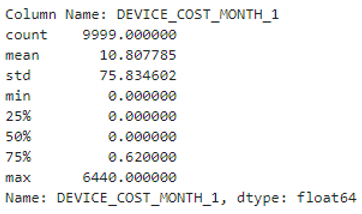

## 1.2. Inventory of device models

In [8]:
model_census = input_dataset['PREVIOUS_DEVICE_MODEL'].value_counts().reset_index()
# I needed to rename the name of the columns since they were rotated and it didn't make sense
model_census = model_census.rename(columns={'index': 'BRAND', 'PREVIOUS_DEVICE_MODEL': 'COUNT'})
print("Census for PREVIOUS_DEVICE_MODEL:")
model_census_df = pd.DataFrame(model_census, columns=['BRAND', 'COUNT']) # Count ==> Frequency (times it appears)
display(model_census_df)


Census for PREVIOUS_DEVICE_MODEL:


,BRAND,COUNT
0,iPhone 7,425
1,iPhone 6,250
2,Samsung Galaxy J5,243
3,iPhone 6S,212
4,Samsung Galaxy J1 Mini,204
...,...,...
575,LG Optimus L3 II,1
576,"Lenovo S930,Lenovo S939",1
577,Samsung Corby II,1
578,SGH-U600,1


In [9]:
brand_census = input_dataset['PREVIOUS_DEVICE_BRAND'].value_counts().reset_index()
brand_census = brand_census.rename(columns={'index': 'BRAND', 'PREVIOUS_DEVICE_BRAND': 'COUNT'})

print("\nCensus for PREVIOUS_DEVICE_BRAND:")
brand_census_df = pd.DataFrame(brand_census, columns=['BRAND', 'COUNT']) # Count ==> Frequency (times it appears)
display(brand_census_df)


Census for PREVIOUS_DEVICE_BRAND:


,BRAND,COUNT
0,Samsung,1877
1,Outros,1592
2,Apple,1548
3,Motorola,638
4,LG,514


We can see that in the case of best-selling models, there is quite a superiority to the most recent iPhone and the second to the previous iPhone, however, although they win in these statistics we can see that in the global brand values they are not the first, this tells us It is saying that the Apple brand can be a big seller in some very specific products, but there are other brands that, by having more accessories in their warehouse, can sell many different models and that makes them have better numbers. This is the case of Samsumg, which at the same time have many more models than Apple so from a global perspective in sales they win.

# 2. Feature engineering

## 2.1. Missing values management

In [10]:
nan_count = input_dataset.isna().sum()  # we count the null values to save them in a variable
non_nan_count = input_dataset.count()   # we count the non-null values to save them in a variable
# Now we create a Dataframe
nan_counter_df = pd.DataFrame({'Column Name': nan_count.index, 'NaN Count': nan_count.values, 'Non-NaN Count': non_nan_count.values})
display(nan_counter_df)

,Column Name,NaN Count,Non-NaN Count
0,PURCHASED_DEVICE,147,9853
1,DEVICE_VALUE,310,9690
2,LAST_DEVICE_CHANGE,2318,7682
3,DATA_TRAFFIC_MONTH_1,1132,8868
4,DATA_TRAFFIC_MONTH_2,1159,8841
5,DATA_TRAFFIC_MONTH_3,1154,8846
6,DATA_TRAFFIC_MONTH_4,1183,8817
7,DATA_TRAFFIC_MONTH_5,1134,8866
8,DATA_TRAFFIC_MONTH_6,1465,8535
9,VOICE_TRAFFIC_MONTH_1,1132,8868


In [11]:
df01 = input_dataset
df02 = df01.dropna(subset = ['PURCHASED_DEVICE'])       # We delete the nan values
df03 = df02.dropna(subset = ['DEVICE_VALUE'])
df04 = df03.dropna(subset = ['PREVIOUS_DEVICE_MODEL'])

print("Comparing values :")
print("-"*40)
print("Before removing:", df01['PURCHASED_DEVICE'].isnull().sum(), " ----> After: ",df04['PURCHASED_DEVICE'].isnull().sum())
print("Before removing:", df01['DEVICE_VALUE'].isnull().sum(), " ----> After: ",df04['DEVICE_VALUE'].isnull().sum())
print("Before removing:", df01['PREVIOUS_DEVICE_MODEL'].isnull().sum(), "----> After: ",df04['PREVIOUS_DEVICE_MODEL'].isnull().sum())
print("-"*40)
print("We can see that they have been removed correctly")

Comparing values :
----------------------------------------
Before removing: 147  ----> After:  0
Before removing: 310  ----> After:  0
Before removing: 3831 ----> After:  0
----------------------------------------
We can see that they have been removed correctly


In [12]:
columns = ['DATA_TRAFFIC_MONTH_1', 'DATA_TRAFFIC_MONTH_2', 'DATA_TRAFFIC_MONTH_3',
                     'DATA_TRAFFIC_MONTH_4', 'DATA_TRAFFIC_MONTH_5', 'DATA_TRAFFIC_MONTH_6',
                     'VOICE_TRAFFIC_MONTH_1', 'VOICE_TRAFFIC_MONTH_2', 'VOICE_TRAFFIC_MONTH_3',
                     'VOICE_TRAFFIC_MONTH_4', 'VOICE_TRAFFIC_MONTH_5', 'VOICE_TRAFFIC_MONTH_6',
                     'BILLING_MONTH_1', 'BILLING_MONTH_2', 'BILLING_MONTH_3',
                     'BILLING_MONTH_4', 'BILLING_MONTH_5', 'BILLING_MONTH_6',
                     'DEVICE_COST_MONTH_1', 'DEVICE_COST_MONTH_2', 'DEVICE_COST_MONTH_3',
                     'DEVICE_COST_MONTH_4', 'DEVICE_COST_MONTH_5', 'DEVICE_COST_MONTH_6']

# We need to do a copy of the original one to don't modify
df05 = df04.copy() 
df05[columns] = df05[columns].fillna(0)  

# We make a print to check that it really worked
for i in columns:
    print(i, " --> Before:", df04[i].isnull().sum(), " ==> After: ", df05[i].isnull().sum())


DATA_TRAFFIC_MONTH_1  --> Before: 679  ==> After:  0
DATA_TRAFFIC_MONTH_2  --> Before: 689  ==> After:  0
DATA_TRAFFIC_MONTH_3  --> Before: 680  ==> After:  0
DATA_TRAFFIC_MONTH_4  --> Before: 694  ==> After:  0
DATA_TRAFFIC_MONTH_5  --> Before: 658  ==> After:  0
DATA_TRAFFIC_MONTH_6  --> Before: 904  ==> After:  0
VOICE_TRAFFIC_MONTH_1  --> Before: 679  ==> After:  0
VOICE_TRAFFIC_MONTH_2  --> Before: 689  ==> After:  0
VOICE_TRAFFIC_MONTH_3  --> Before: 680  ==> After:  0
VOICE_TRAFFIC_MONTH_4  --> Before: 694  ==> After:  0
VOICE_TRAFFIC_MONTH_5  --> Before: 658  ==> After:  0
VOICE_TRAFFIC_MONTH_6  --> Before: 904  ==> After:  0
BILLING_MONTH_1  --> Before: 0  ==> After:  0
BILLING_MONTH_2  --> Before: 1  ==> After:  0
BILLING_MONTH_3  --> Before: 5  ==> After:  0
BILLING_MONTH_4  --> Before: 6  ==> After:  0
BILLING_MONTH_5  --> Before: 7  ==> After:  0
BILLING_MONTH_6  --> Before: 11  ==> After:  0
DEVICE_COST_MONTH_1  --> Before: 0  ==> After:  0
DEVICE_COST_MONTH_2  --> Before

In [13]:
df06 = df05.copy()
df06['LINE_ACTIVATION_DATE'].fillna(df05['LAST_DEVICE_CHANGE'], inplace=True)
print("Before:", df04[i].isnull().sum(), "==>> After: ", df05[i].isnull().sum())

Before: 11 ==>> After:  0


In [14]:
ap_dataset = pd.DataFrame(df06)
display(ap_dataset.head(10)) # first ten rows

,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,DEVICE_COST_MONTH_3,DEVICE_COST_MONTH_4,DEVICE_COST_MONTH_5,DEVICE_COST_MONTH_6,LINE_ACTIVATION_DATE,MONTHS_LAST_DEVICE,DURATION_LINE,PREVIOUS_DEVICE_MODEL,PREVIOUS_DEVICE_MANUF,PREVIOUS_DEVICE_BRAND
0,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,393.0,NaN,465.24673,530.80615,530.80615,781.12646,398.99377,1169.39610,47.500000,...,12.0,12.0,12.0,12.0,20041220.0,NaN,172.0,Moto G4 Plus,"Motorola Mobility LLC, a Lenovo Company",Motorola
1,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,20170401.0,232.24121,272.25525,272.25525,704.88519,412.71664,365.14441,3.700000,...,0.0,0.0,0.0,0.0,20170405.0,20.0,20.0,Samsung Galaxy J1 Mini,Samsung Korea,Samsung
2,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,875.0,NaN,484.62036,264.13843,264.13843,348.50073,380.44156,250.73566,26.100000,...,0.0,0.0,0.0,0.0,20040412.0,NaN,176.0,Moto E (2ª Geração),"Motorola Mobility LLC, a Lenovo Company",Motorola
3,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,20171001.0,4255.46040,836.11707,836.11707,691.55640,146.76660,302.49249,175.700000,...,6.0,6.0,6.0,6.0,20110825.0,14.0,88.0,iPhone 6,Apple Inc,Apple
4,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,609.0,20190101.0,5014.10300,2659.05150,2659.05150,2435.03930,2053.97950,1553.11500,383.899990,...,0.0,0.0,0.0,0.0,20140617.0,-1.0,54.0,K10a40,"Motorola Mobility LLC, a Lenovo Company",Outros
5,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,297.0,20170901.0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,108.500000,...,0.0,0.0,0.0,0.0,20170905.0,15.0,15.0,GL865-QUAD,Telit Communications SpA,Outros
6,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,20150701.0,1127.10790,268.22552,268.22552,320.17395,135.45976,212.06636,370.899990,...,0.0,0.0,0.0,0.0,20100809.0,41.0,100.0,Moto G com 4G (2ª Geração),"Motorola Mobility LLC, a Lenovo Company",Motorola
7,DGAP068C2000_APPLE IPHONE 8 256GB CINZA PPB/PI...,3465.0,20170101.0,1520.20560,2196.57450,2196.57450,1815.70090,2101.68160,3224.28340,206.899990,...,13.0,13.0,13.0,13.0,20121029.0,23.0,74.0,iPhone 6,Apple Inc,Apple
8,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,415.0,20181101.0,10789.82000,10423.67400,10423.67400,5188.59670,7379.40430,6789.48290,64.300003,...,0.0,0.0,0.0,0.0,20120509.0,1.0,79.0,iPhone 6,Apple Inc,Apple
9,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,20141101.0,793.15601,734.51996,734.51996,156.38121,467.95233,721.30389,2.700000,...,0.0,0.0,0.0,0.0,20141130.0,49.0,49.0,Samsung Galaxy J5,Samsung Korea,Samsung


In [15]:
M = df01.shape[0]
N = df06.shape[0]

percentage_dropped = 100 * (M - N) / M

columns_with_nan = df06.columns[df06.isnull().any()].tolist()

print('-'*55)
print(f"Rows in the original dataset: {M}")
print(f"Rows in the new dataset: {N} ({percentage_dropped:.2f}% less/dropped)")
print('-'*55)

if columns_with_nan:
    print("Columns with NaN values in the new dataset:")
    print('-'*55)
    for column in columns_with_nan:
        print('->', column)
else:
    print("No columns with NaN values in the new dataset.")

-------------------------------------------------------
Rows in the original dataset: 10000
Rows in the new dataset: 5988 (40.12% less/dropped)
-------------------------------------------------------
Columns with NaN values in the new dataset:
-------------------------------------------------------
-> LAST_DEVICE_CHANGE
-> LINE_ACTIVATION_DATE
-> MONTHS_LAST_DEVICE
-> DURATION_LINE


## 2.2. Distributions, outliers, and correlations

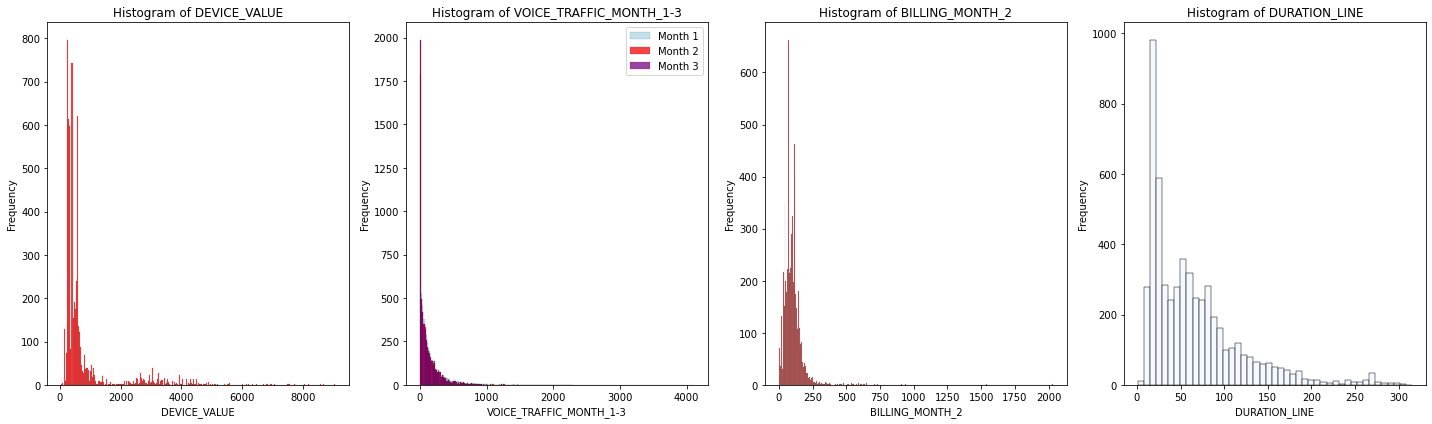

In [16]:
# Create subplots with 1 row and 4 columns
# So when we plot them ,we can put them side by side to compare them better
fig, axes = plt.subplots(1, 4, figsize=(20, 6))

sns.histplot(df06['DEVICE_VALUE'], kde=False, color='red', ax=axes[0])
axes[0].set_xlabel('DEVICE_VALUE')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram of DEVICE_VALUE')

sns.histplot(df06['VOICE_TRAFFIC_MONTH_1'], kde=False, color='lightblue', label='Month 1', ax=axes[1])
sns.histplot(df06['VOICE_TRAFFIC_MONTH_2'], kde=False, color='red', label='Month 2', ax=axes[1])
sns.histplot(df06['VOICE_TRAFFIC_MONTH_3'], kde=False, color='purple', label='Month 3', ax=axes[1])

axes[1].set_xlabel('VOICE_TRAFFIC_MONTH_1-3')
axes[1].set_ylabel('Frequency')
axes[1].legend()
axes[1].set_title('Histogram of VOICE_TRAFFIC_MONTH_1-3')

sns.histplot(df06['BILLING_MONTH_2'], kde=False, color='brown', ax=axes[2])
axes[2].set_xlabel('BILLING_MONTH_2')
axes[2].set_ylabel('Frequency')
axes[2].set_title('Histogram of BILLING_MONTH_2')

sns.histplot(df06['DURATION_LINE'], kde=False, color='AliceBlue', ax=axes[3])
axes[3].set_xlabel('DURATION_LINE')
axes[3].set_ylabel('Frequency')
axes[3].set_title('Histogram of DURATION_LINE')

plt.tight_layout()  
plt.show()

#### Comment:

In the case of figures 2 and 4 we can see an exponential decay very characteristic of an exponential distribution. We can also see that there is no type of symmetry and there is no cut-off point, so we could say that these distributions are exponential.


On the other hand, we can see that figures 1 and 3 have a certain symmetry at first glance, a midpoint that could be divided into two parts, but since the scale of the values is so different, since we can see very high values and others are quite low, we cannot firmly determine that it is a normal distribution, however at first glance we could follow that these data follow a normal distribution. (bimodal)


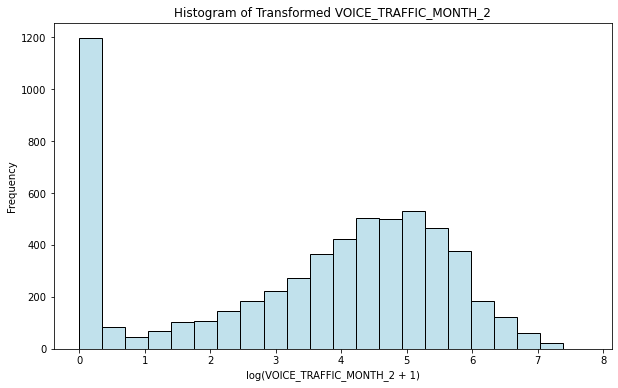

In [17]:
# Apply log(x+1) transformation to VOICE_TRAFFIC_MONTH_2
df06['VOICE_TRAFFIC_MONTH_2_log'] = np.log(df06['VOICE_TRAFFIC_MONTH_2']+1)

# We create a histogram for the transformed variable
plt.figure(figsize=(10, 6))
sns.histplot(df06['VOICE_TRAFFIC_MONTH_2_log'], kde=False, color='lightblue')
plt.xlabel('log(VOICE_TRAFFIC_MONTH_2 + 1)')
plt.ylabel('Frequency')
plt.title('Histogram of Transformed VOICE_TRAFFIC_MONTH_2')
plt.show()

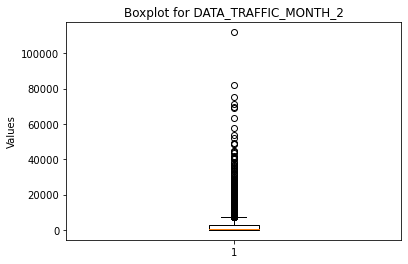

In [18]:
# Creataing individual boxplots 
plt.figure(figsize=(6, 4))
plt.boxplot(df06['DATA_TRAFFIC_MONTH_2'])
plt.ylabel('Values')
plt.title('Boxplot for DATA_TRAFFIC_MONTH_2')
plt.show()

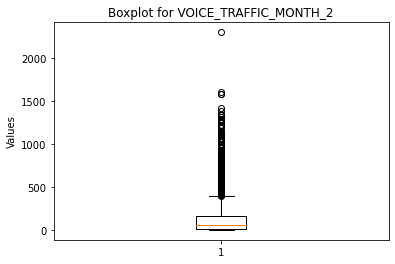

In [19]:
plt.figure(figsize=(6, 4))
plt.boxplot(df06['VOICE_TRAFFIC_MONTH_2'])
plt.ylabel('Values')
plt.title('Boxplot for VOICE_TRAFFIC_MONTH_2')
plt.show()

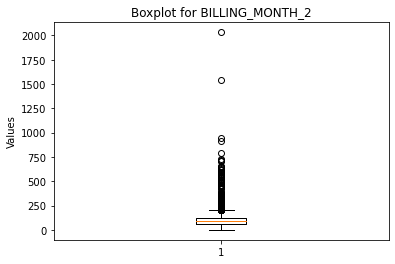

In [20]:
plt.figure(figsize=(6, 4))
plt.boxplot(df06['BILLING_MONTH_2'])
plt.ylabel('Values')
plt.title('Boxplot for BILLING_MONTH_2')
plt.show()

We have 3 boxplots:
- In the first we can see that the scale of values is quite wide, at first glance we could say that the average of the values is around a fairly small value, however we can see that there are values that exceed the rule of 1,5IQR and we can observe many atypical observations that have very high values, in this case they would be values that have almost no probability. 
- In the second boxplot, we can see that the scale has already decreased quite a bit with the maximum value around 3000, however we can see the same dynamics as the previous boxplot, but again with a smaller scale. It is characterized by having the mean with fairly low values but then we clearly see outliers that are values much larger than the mean.In this case we have to emphasize that the variance can be seen to be greater than the other boxplots.
- In this case it is very similar to the previous one, it follows the same dynamics, average with small values and some values much larger than the average.

In general we can see that these graphs explain the trend that we have been able to see in the previous graphs that we could see more or less what type of distribution it was. Since we see the same exponential trend with many small values and few large ones.

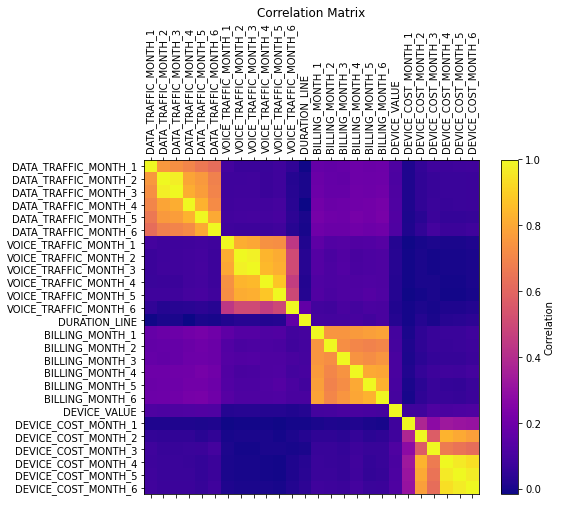

In [21]:
# Select the columns of interest
columns_of_interest = ['DATA_TRAFFIC_MONTH_1','DATA_TRAFFIC_MONTH_2','DATA_TRAFFIC_MONTH_3','DATA_TRAFFIC_MONTH_4','DATA_TRAFFIC_MONTH_5','DATA_TRAFFIC_MONTH_6',
       'VOICE_TRAFFIC_MONTH_1','VOICE_TRAFFIC_MONTH_2','VOICE_TRAFFIC_MONTH_3','VOICE_TRAFFIC_MONTH_4','VOICE_TRAFFIC_MONTH_5','VOICE_TRAFFIC_MONTH_6',
       'DURATION_LINE','BILLING_MONTH_1','BILLING_MONTH_2','BILLING_MONTH_3','BILLING_MONTH_4','BILLING_MONTH_5','BILLING_MONTH_6','DEVICE_VALUE',
       'DEVICE_COST_MONTH_1','DEVICE_COST_MONTH_2','DEVICE_COST_MONTH_3','DEVICE_COST_MONTH_4','DEVICE_COST_MONTH_5','DEVICE_COST_MONTH_6']

# Create a subset DataFrame with the selected columns
subset_df = df06[columns_of_interest]

# Calculate the correlation matrix
correlation_matrix = subset_df.corr()

# Display the correlation matrix as an image
plt.figure(figsize=(8, 6))
plt.matshow(correlation_matrix, cmap='plasma', fignum=1)
plt.colorbar(label='Correlation')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Matrix')
plt.show()

We can clearly see that there is a higher correlation between variables that are from the same subgroup, with which we see in the matrix groups of warmer color since they are those variables that are more correlated between them, that is, that there is some type of dependency between these variables.
We see that Data Traffic has warmer values in a more general way, however there is a variable in Voice Traffic that is not completely correlated with the others, so we can say that Data Traffic has more correlation than the other.
In comparison to Billing with Data traffic it is very similar, at first glance we could say that there are some Data Traffic variables with more correlation but we could not add much either.

## 2.3. Date management and period calculation

In [22]:
last_device_change_max = df06['LAST_DEVICE_CHANGE'].max()
last_device_change_str = str(int(last_device_change_max))
latest_change = datetime.datetime.strptime(last_device_change_str, '%Y%m%d')

now = latest_change + datetime.timedelta(days=30)

print("latest_change:", latest_change)
print("now:", now)

latest_change: 2019-05-01 00:00:00
now: 2019-05-31 00:00:00


In [23]:
series_converted = pd.to_datetime(df06['LAST_DEVICE_CHANGE'], format='%Y%m%d')
now = latest_change + datetime.timedelta(days=30)
df06['MONTHS_LAST_DEVICE'] = ((now - series_converted) / (30*pd.Timedelta(days=1))).fillna(0).astype(int)
print(df06[['LAST_DEVICE_CHANGE', 'MONTHS_LAST_DEVICE']])


      LAST_DEVICE_CHANGE  MONTHS_LAST_DEVICE
0                    NaN                   0
1             20170401.0                  26
2                    NaN                   0
3             20171001.0                  20
4             20190101.0                   5
...                  ...                 ...
9994                 NaN                   0
9995          20170401.0                  26
9996          20180401.0                  14
9997                 NaN                   0
9999                 NaN                   0

[5988 rows x 2 columns]


In [24]:
series_converted = pd.to_datetime(df06['LINE_ACTIVATION_DATE'], format='%Y%m%d')
now = latest_change + datetime.timedelta(days=30)
df06['DURATION_LINE'] = ((now - series_converted) / pd.Timedelta(days=1)).fillna(0).astype(int)
average_duration_years = df06['DURATION_LINE'].mean() / 365
print(f"The average duration of DURATION_LINE is approximately -> {average_duration_years:.2f} years.")


The average duration of DURATION_LINE is approximately -> 5.23 years.



## 2.4. Standarization and scaling of numerical variables

In [25]:
columns_to_scale=['DATA_TRAFFIC_MONTH_1','VOICE_TRAFFIC_MONTH_1','BILLING_MONTH_1','DEVICE_COST_MONTH_1']
for column in columns_to_scale:
    df06[column + '_STANDARD'] = StandardScaler().fit_transform(df06[[column]])
    df06[column + '_MINMAX'] = MinMaxScaler().fit_transform(df06[[column]])

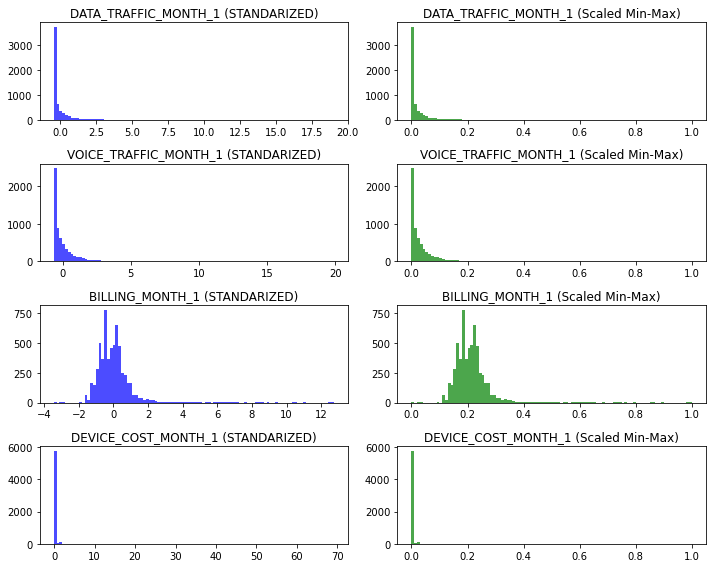

In [26]:
fig, axs = plt.subplots(len(columns_to_scale), 2, figsize=(10, 8))

for i, column in enumerate(columns_to_scale):
    axs[i, 0].hist(df06[column + '_STANDARD'], bins=100, color='blue', alpha=0.7)
    axs[i, 0].set_title(column + ' (STANDARIZED)')
    
    axs[i, 1].hist(df06[column + '_MINMAX'], bins=100, color='green', alpha=0.7)
    axs[i, 1].set_title(column + ' (Scaled Min-Max)')

# Ajustar la disposición de los subplots
plt.tight_layout()
plt.show()

## 2.5. Convert categorical columns to dummy binary variables

In [27]:
label_encoder = LabelEncoder()
df06['PREVIOUS_DEVICE_BRAND_INT_ENCODED'] = label_encoder.fit_transform(df06['PREVIOUS_DEVICE_BRAND'])
df06.head()

,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,VOICE_TRAFFIC_MONTH_2_log,DATA_TRAFFIC_MONTH_1_STANDARD,DATA_TRAFFIC_MONTH_1_MINMAX,VOICE_TRAFFIC_MONTH_1_STANDARD,VOICE_TRAFFIC_MONTH_1_MINMAX,BILLING_MONTH_1_STANDARD,BILLING_MONTH_1_MINMAX,DEVICE_COST_MONTH_1_STANDARD,DEVICE_COST_MONTH_1_MINMAX,PREVIOUS_DEVICE_BRAND_INT_ENCODED
0,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,393.0,NaN,465.24673,530.80615,530.80615,781.12646,398.99377,1169.39610,47.50000,...,3.126760,-0.361918,0.004138,-0.414888,0.011549,-0.196703,0.201028,0.019216,0.001863,2
1,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,20170401.0,232.24121,272.25525,272.25525,704.88519,412.71664,365.14441,3.70000,...,0.405465,-0.402274,0.002066,-0.633700,0.000900,-0.800894,0.163679,-0.109773,0.000000,4
2,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,875.0,NaN,484.62036,264.13843,264.13843,348.50073,380.44156,250.73566,26.10000,...,5.392263,-0.358563,0.004311,-0.521796,0.006346,0.346838,0.234627,-0.109773,0.000000,2
3,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,20171001.0,4255.46040,836.11707,836.11707,691.55640,146.76660,302.49249,175.70000,...,5.381279,0.294532,0.037853,0.225559,0.042718,-0.602781,0.175925,-0.045279,0.000932,0
4,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,609.0,20190101.0,5014.10300,2659.05150,2659.05150,2435.03930,2053.97950,1553.11500,383.89999,...,0.000000,0.425926,0.044601,1.265663,0.093338,0.171507,0.223789,-0.109773,0.000000,3


In [28]:
manuf_dummies = pd.get_dummies(df06['PREVIOUS_DEVICE_MANUF'], prefix='PREVIOUS_DEVICE_MANUF')
df06_df_with_dummies = df06.join(manuf_dummies)
df06_df_with_dummies.head()

,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,PREVIOUS_DEVICE_MANUF_Telit Communications SpA,PREVIOUS_DEVICE_MANUF_Topmax Glory Limited,PREVIOUS_DEVICE_MANUF_Umi Network Technology Co Limited,PREVIOUS_DEVICE_MANUF_United Mobile,PREVIOUS_DEVICE_MANUF_United Time Hong Kong Ltd,PREVIOUS_DEVICE_MANUF_Vikin Communication Technology Co Limited,PREVIOUS_DEVICE_MANUF_Vogtec (H.K) Co Ltd,PREVIOUS_DEVICE_MANUF_Xiaomi Communications Co Ltd,PREVIOUS_DEVICE_MANUF_ZTE Corporation,PREVIOUS_DEVICE_MANUF_u-blox AG
0,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,393.0,NaN,465.24673,530.80615,530.80615,781.12646,398.99377,1169.39610,47.50000,...,0,0,0,0,0,0,0,0,0,0
1,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,20170401.0,232.24121,272.25525,272.25525,704.88519,412.71664,365.14441,3.70000,...,0,0,0,0,0,0,0,0,0,0
2,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,875.0,NaN,484.62036,264.13843,264.13843,348.50073,380.44156,250.73566,26.10000,...,0,0,0,0,0,0,0,0,0,0
3,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,20171001.0,4255.46040,836.11707,836.11707,691.55640,146.76660,302.49249,175.70000,...,0,0,0,0,0,0,0,0,0,0
4,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,609.0,20190101.0,5014.10300,2659.05150,2659.05150,2435.03930,2053.97950,1553.11500,383.89999,...,0,0,0,0,0,0,0,0,0,0


## 2.6. Feature generation

In [29]:
columns_to_process = ['DATA_TRAFFIC', 'VOICE_TRAFFIC', 'BILLING', 'DEVICE_COST']

# Iterate over each column prefix and calculate mean, max, min, and range
for column_prefix in columns_to_process:
    columns = [f"{column_prefix}_MONTH_{i}" for i in range(1, 7)]

    # Calculate mean, max, min, and range for the current column prefix
    df06_df_with_dummies[f'{column_prefix}_MEAN'] = df06_df_with_dummies[columns].mean(axis=1)
    df06_df_with_dummies[f'{column_prefix}_MAX'] = df06_df_with_dummies[columns].max(axis=1)
    df06_df_with_dummies[f'{column_prefix}_MIN'] = df06_df_with_dummies[columns].min(axis=1)
    df06_df_with_dummies[f'{column_prefix}_RANGE'] = df06_df_with_dummies[f'{column_prefix}_MAX'] - df06_df_with_dummies[f'{column_prefix}_MIN']

# Display the DataFrame with new columns
display(df06_df_with_dummies)

,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,VOICE_TRAFFIC_MIN,VOICE_TRAFFIC_RANGE,BILLING_MEAN,BILLING_MAX,BILLING_MIN,BILLING_RANGE,DEVICE_COST_MEAN,DEVICE_COST_MAX,DEVICE_COST_MIN,DEVICE_COST_RANGE
0,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,393.0,NaN,465.24673,530.80615,530.80615,781.126460,398.993770,1169.39610,47.50000,...,21.799999,57.899998,92.958333,107.93,85.00,22.93,12.0,12.0,12.0,0.0
1,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,20170401.0,232.24121,272.25525,272.25525,704.885190,412.716640,365.14441,3.70000,...,0.500000,4.400000,49.435000,56.56,47.00,9.56,0.0,0.0,0.0,0.0
2,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,875.0,NaN,484.62036,264.13843,264.13843,348.500730,380.441560,250.73566,26.10000,...,26.100000,192.600000,121.781667,129.14,113.77,15.37,0.0,0.0,0.0,0.0
3,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,20171001.0,4255.46040,836.11707,836.11707,691.556400,146.766600,302.49249,175.70000,...,119.000000,112.200000,58.216667,60.93,55.99,4.94,6.0,6.0,6.0,0.0
4,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,609.0,20190101.0,5014.10300,2659.05150,2659.05150,2435.039300,2053.979500,1553.11500,383.89999,...,0.000000,383.899990,109.700000,110.69,107.99,2.70,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,297.0,NaN,11032.31700,5755.06540,5755.06540,5290.147500,2917.549800,4494.50200,597.79999,...,512.099980,289.800040,176.405000,204.96,160.57,44.39,0.0,0.0,0.0,0.0
9995,TGMO36762000_MOTOROLA XT1941 SMARTPHONE PRETO,1041.0,20170401.0,24526.06600,14820.21800,14820.21800,19684.520000,10024.089000,7423.10740,247.50000,...,119.700000,134.000000,52.486667,52.97,51.67,1.30,0.0,0.0,0.0,0.0
9996,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,585.0,20180401.0,1007.76560,335.01740,335.01740,171.912730,555.694210,425.69946,88.50000,...,0.000000,88.500000,134.990000,134.99,134.99,0.00,9.0,9.0,9.0,0.0
9997,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,585.0,NaN,189.17578,155.54840,155.54840,51.755936,62.371407,230.53328,38.50000,...,0.000000,38.500000,157.480000,203.53,134.99,68.54,0.0,0.0,0.0,0.0


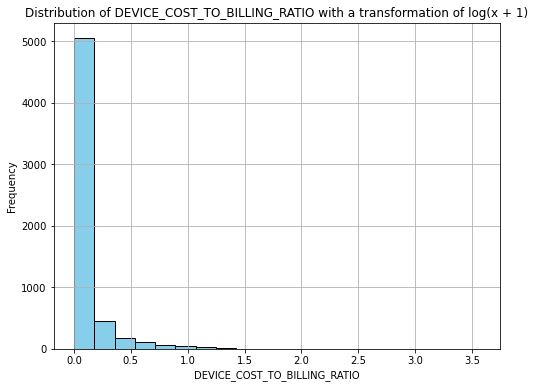

In [30]:
df06_df_with_dummies['DEVICE_COST_TO_BILLING_RATIO'] = df06_df_with_dummies['DEVICE_COST_MEAN'] / df06_df_with_dummies['BILLING_MEAN']


plt.figure(figsize=(8, 6))
plt.hist(np.log(df06_df_with_dummies['DEVICE_COST_TO_BILLING_RATIO']+1), bins=20, color='skyblue', edgecolor='black')
plt.xlabel('DEVICE_COST_TO_BILLING_RATIO')
plt.ylabel('Frequency')
plt.title('Distribution of DEVICE_COST_TO_BILLING_RATIO with a transformation of log(x + 1)')
plt.grid(True)
plt.show()

In this case we can say simply by looking at the graph that it is an exponential distribution, since it has the typical exponential decay of this distribution.
We can see that the frequency decreases exponentially as the cost ratio increases, this is quite logical because people tend to buy things that are cheaper and on the other hand there are some very high priced things that are not bought by many people.

## 2.7. Text parsing/processing

In [31]:
llista = df06_df_with_dummies["PURCHASED_DEVICE"].str.split(pat= "_",expand = True)
device_code = llista[0]

llista = llista[1].str.split(n = 1,expand = True)
manufacture = llista[0]
device_model = llista[1]

df06_df_with_dummies["PURCHASED_DEVICE_CODE"] = device_code
df06_df_with_dummies["PURCHASED_DEVICE_MANUFACTURER"] = manufacture
df06_df_with_dummies["PURCHASED_DEVICE_MODEL"] = device_model

df06_df_with_dummies.head()

,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,BILLING_MIN,BILLING_RANGE,DEVICE_COST_MEAN,DEVICE_COST_MAX,DEVICE_COST_MIN,DEVICE_COST_RANGE,DEVICE_COST_TO_BILLING_RATIO,PURCHASED_DEVICE_CODE,PURCHASED_DEVICE_MANUFACTURER,PURCHASED_DEVICE_MODEL
0,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,393.0,NaN,465.24673,530.80615,530.80615,781.12646,398.99377,1169.39610,47.50000,...,85.00,22.93,12.0,12.0,12.0,0.0,0.129090,TGLG29162000,LG,X210BMW SMARTPHONE PRETO PPB/P1769/07
1,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,20170401.0,232.24121,272.25525,272.25525,704.88519,412.71664,365.14441,3.70000,...,47.00,9.56,0.0,0.0,0.0,0.0,0.000000,TGLG29162000,LG,X210BMW SMARTPHONE PRETO PPB/P1769/07
2,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,875.0,NaN,484.62036,264.13843,264.13843,348.50073,380.44156,250.73566,26.10000,...,113.77,15.37,0.0,0.0,0.0,0.0,0.000000,TGMO35912000,MOTOROLA,XT1922 SMARTPHONE INDIGO
3,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,20171001.0,4255.46040,836.11707,836.11707,691.55640,146.76660,302.49249,175.70000,...,55.99,4.94,6.0,6.0,6.0,0.0,0.103063,TGLG29162000,LG,X210BMW SMARTPHONE PRETO PPB/P1769/07
4,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,609.0,20190101.0,5014.10300,2659.05150,2659.05150,2435.03930,2053.97950,1553.11500,383.89999,...,107.99,2.70,0.0,0.0,0.0,0.0,0.000000,TGMO35912000,MOTOROLA,XT1922 SMARTPHONE INDIGO


In [32]:
purchased_device_manufacturer = df06_df_with_dummies["PURCHASED_DEVICE_MANUFACTURER"].value_counts()
df_purchased_device_manufacturer = pd.DataFrame(purchased_device_manufacturer)
display(df_purchased_device_manufacturer)

,PURCHASED_DEVICE_MANUFACTURER
LG,3556
SAMSUNG,1094
MOTOROLA,630
APPLE,448
ALCATEL,258
ASUS,2


In [33]:
previous_device_manufacturer = df06_df_with_dummies["PREVIOUS_DEVICE_MANUF"].value_counts()
df_previous_device_manufacturer = pd.DataFrame(previous_device_manufacturer)
display(df_previous_device_manufacturer)

,PREVIOUS_DEVICE_MANUF
Samsung Korea,1879
Apple Inc,1495
"Motorola Mobility LLC, a Lenovo Company",849
LG Electronics Inc.,506
TCL Communication Ltd,279
...,...
Lanxun Technology (Hong Kong) Limited,1
Beijing Flyscale Technologies Company Limited,1
Meizu Technology Co Ltd,1
TP-Link Technologies Co Ltd,1


## 2.8. Splitting and sampling a dataset

In [34]:
X_train, X_test = train_test_split(df06_df_with_dummies, test_size=0.3, random_state=42)
print("="*40)
print("The training dataset have: ", X_train.shape)
print("The test dataset have:     ", X_test.shape)
print("="*40)

The training dataset have:  (4191, 130)
The test dataset have:      (1797, 130)


In [35]:
print("Statistics about the Train Dataset")
display(X_train["DATA_TRAFFIC_MONTH_1"].describe(),X_train["VOICE_TRAFFIC_MONTH_1"].describe(),X_train["BILLING_MONTH_1"].describe())

Statistics about the Train Dataset


count      4191.000000
mean       2549.413369
std        5612.925323
min           0.000000
25%           0.000000
50%         399.495180
75%        2842.258300
max      112421.170000
Name: DATA_TRAFFIC_MONTH_1, dtype: float64

count    4191.000000
mean      132.017466
std       203.667800
min         0.000000
25%        10.200000
50%        64.199997
75%       171.550005
max      4113.000000
Name: VOICE_TRAFFIC_MONTH_1, dtype: float64

count    4191.000000
mean      100.034102
std        65.029060
min      -124.490000
25%        63.355000
50%        92.990000
75%       121.140000
max       911.720000
Name: BILLING_MONTH_1, dtype: float64

In [36]:
print("Statistics about the Test Dataset")
display(X_test["DATA_TRAFFIC_MONTH_1"].describe(),X_test["VOICE_TRAFFIC_MONTH_1"].describe(),X_test["BILLING_MONTH_1"].describe())

Statistics about the Test Dataset


count     1797.000000
mean      2567.662237
std       6135.745486
min          0.000000
25%          0.000000
50%        346.775850
75%       2419.699500
max      97074.617000
Name: DATA_TRAFFIC_MONTH_1, dtype: float64

count    1797.000000
mean      127.124931
std       191.842889
min         0.000000
25%         9.200000
50%        58.700001
75%       165.200000
max      2377.899900
Name: VOICE_TRAFFIC_MONTH_1, dtype: float64

count    1797.000000
mean       98.415643
std        64.830347
min       -21.030000
25%        63.000000
50%        92.690000
75%       120.840000
max       926.410000
Name: BILLING_MONTH_1, dtype: float64

By having a large base of observations we can see that they will be good estimators for the mean and variance.
In the case of train set we have more than 4000 observations and on the other hand in the case of the test we have almost 1800 observations, this will help us to ensure that there is not too much overtraining in the given ones to be able to make good predictions.

In general, as we have already said, we can see that the values obtained are quite similar since the number of samples is quite large and the values are maintained quite well. Yes, there will be a minimum of changes but they will not be completely significant.

# 3. Comparing iPhone and Samsung J series users

In [37]:
apple_users_df = df06_df_with_dummies[df06_df_with_dummies["PURCHASED_DEVICE_MANUFACTURER"] == "APPLE"]
samsung_j_series_df = df06_df_with_dummies[df06_df_with_dummies["PURCHASED_DEVICE_MANUFACTURER"].str.startswith("SAMSUNG")]
samsung_j_series_df = samsung_j_series_df[samsung_j_series_df["PURCHASED_DEVICE_MODEL"].str.startswith("J")]


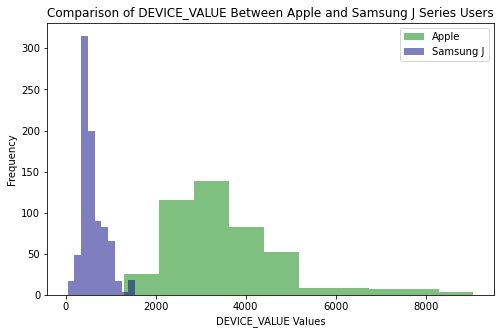

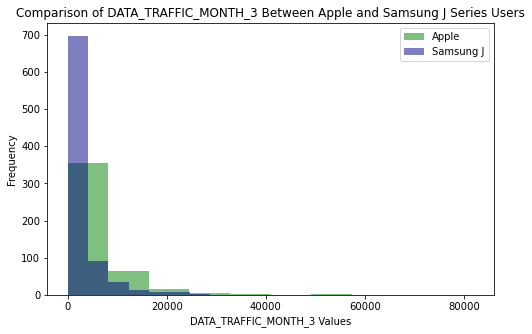

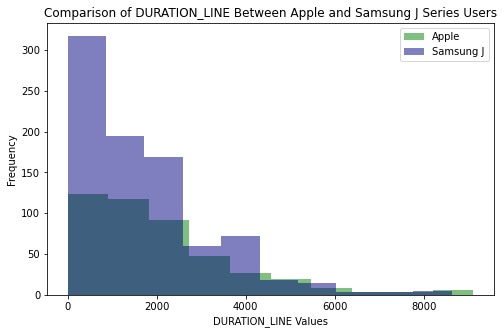

In [38]:
    variables_to_compare = ["DEVICE_VALUE", "DATA_TRAFFIC_MONTH_3", "DURATION_LINE"]

    for variable in variables_to_compare:
        plt.figure(figsize=(8, 5))

        plt.hist(apple_users_df[variable], alpha=0.5, label="Apple", bins=10, color = "green")
        plt.hist(samsung_j_series_df[variable], alpha=0.5, label="Samsung J", bins=10, color = "navy")

        plt.xlabel(f"{variable} Values")
        plt.ylabel("Frequency")
        plt.title(f"Comparison of {variable} Between Apple and Samsung J Series Users")
        plt.legend(loc="upper right")

        plt.show()

### Comment
- First graph: we can see two normal distributions, however Apple's we see that it has a higher average price than Samsung's.
- In this second graph we can see that they follow a very similar distribution, in this case exponential, with a large decay in frequency. Samsumg at smaller values of Data Traffic has a high frequency.
- In the third and last case, we can see the same trend as the second case but now the decay is softer and again Samgung is slightly above Apple in terms of frequency.

### Extra points

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score
import matplotlib.pyplot as plt
from sklearn import tree

In [40]:
X = df06_df_with_dummies[["PREVIOUS_DEVICE_MODEL", "PREVIOUS_DEVICE_BRAND", "MONTHS_LAST_DEVICE"]]
y = df06_df_with_dummies["PURCHASED_DEVICE_MANUFACTURER"]

X = pd.get_dummies(X, columns=["PREVIOUS_DEVICE_MODEL", "PREVIOUS_DEVICE_BRAND"])

# We split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

max_depth = 6  # Value that can be edited
clf = DecisionTreeClassifier(max_depth=max_depth, min_samples_split = 40,random_state=42)

# Train the model on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# The values that we want to know:
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted',zero_division=0)
recall = recall_score(y_test, y_pred,average='weighted',zero_division=0)

print("="*20)
print(f"Accuracy  -->: {accuracy:.2f}")
print(f"Recall    -->: {recall:.2f}")
print(f"Precision -->: {precision:.2f}")
print("="*20)

print("  ----- Confusion Matrix:-----  ")
print(confusion)


Accuracy  -->: 0.58
Recall    -->: 0.58
Precision -->: 0.50
  ----- Confusion Matrix:-----  
[[   0    0    0   79    0    1]
 [   0    3    0  135    0    0]
 [   0    0    0    1    0    0]
 [   0   12    0 1033    5    7]
 [   0    1    0  196    4    0]
 [   0    1    0  307    2   10]]


When using Decision Tree we will have to have different characteristics so that there is no overfitting in our analysis. To avoid this overfitting we can use the variable max_depth to indicate a maximum depth of the tree, in this case the variable does not have to be very large because otherwise the data will learn a pattern that is too specific, so we will set a relatively low. On the other hand we have to take into account two more variables, that of min_samples_split and that of min_samples_leaves, in this case we are not going to modify the min_samples_leaves, but we are going to take into account the number of samples that we need to create a new branch , since if this were very small what we have said before would happen that when training the data they would learn more patterns and this is not what we want, but rather we want a prediction that is as real as possible.

When using these columns we see that the values obtained have not been very good because what we want is to maximize the recall and acuraccy value so we are going to have to add variables so that these values improve.

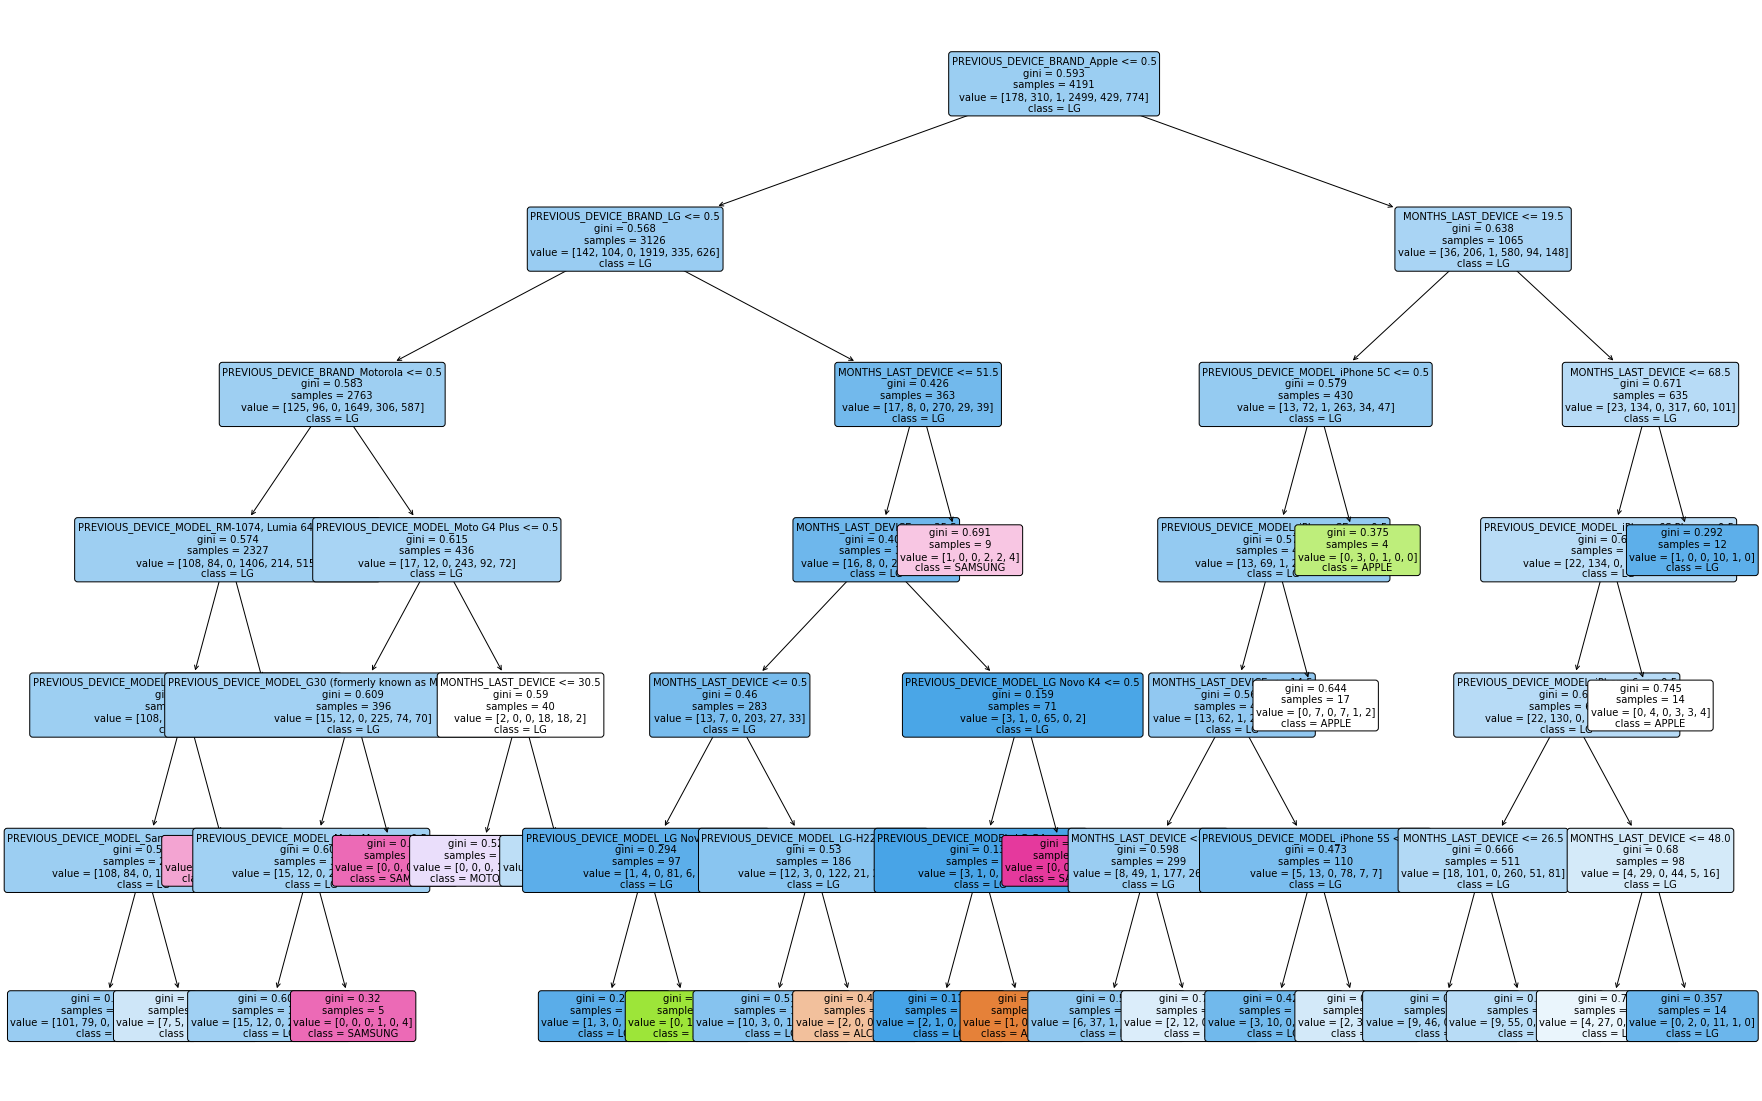

In [41]:
plt.figure(figsize=(30, 20))
tree.plot_tree(clf, feature_names=X.columns, class_names=[str(i) for i in clf.classes_], fontsize = 10,filled=True, rounded=True)
plt.show()

#### Now we add 2 columns

In [42]:
X = df06_df_with_dummies[["PREVIOUS_DEVICE_MODEL", "PREVIOUS_DEVICE_BRAND", "MONTHS_LAST_DEVICE","DEVICE_VALUE","LINE_ACTIVATION_DATE"]]
y = df06_df_with_dummies["PURCHASED_DEVICE_MANUFACTURER"]

print("Elements with Nan:", X.shape[0]) 
# We are going to add X and y to delete all rows that contain a Nan value
# Then we will have the same shape and it's easier to manipulate
temp_df = pd.concat([X, y], axis=1) 
temp_df = temp_df.dropna()

X = temp_df[["PREVIOUS_DEVICE_MODEL", "PREVIOUS_DEVICE_BRAND", "MONTHS_LAST_DEVICE", "DEVICE_VALUE", "LINE_ACTIVATION_DATE"]] #We split another time the values
y = temp_df["PURCHASED_DEVICE_MANUFACTURER"] 
print("Elements without Nan:", X.shape[0]) #To see how many element we had eliminated


X = pd.get_dummies(X, columns=["PREVIOUS_DEVICE_MODEL", "PREVIOUS_DEVICE_BRAND"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

max_depth = 6  # Value that can be edited

clf = DecisionTreeClassifier(max_depth = max_depth,min_samples_split=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy_2 = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
precision_2 = precision_score(y_test, y_pred,average='weighted',zero_division=0)
recall_2 = recall_score(y_test, y_pred,average='weighted',zero_division=0)

print("="*50)
print(f"Accuracy  -->: {accuracy_2:.2f} ==> +{((accuracy_2-accuracy)/(accuracy))*100:.2f}% more than before")
print(f"Recall    -->: {recall_2:.2f} ==> +{((recall_2-recall)/(recall))*100:.2f}% more than before")
print(f"Precision -->: {precision_2:.2f} ==> +{((precision_2-precision)/(precision))*100:.2f}% more than before")
print("="*50)

print("----- Confusion Matrix:-----  ")
print(confusion)

Elements with Nan: 5988
Elements without Nan: 5864
Accuracy  -->: 0.79 ==> +35.36% more than before
Recall    -->: 0.79 ==> +35.36% more than before
Precision -->: 0.78 ==> +55.54% more than before
----- Confusion Matrix:-----  
[[  38    0    0   48    0    0]
 [   0  118    0    0    2    9]
 [   0    0    0    0    1    0]
 [   2    2    0 1005   11    9]
 [   0    4    0   43  110   41]
 [   8   40    0   68   80  121]]


By adding two variables with greater weight we can see that the values that we seek to maximize we see that we have very successfully improved the recall/accuray/precision, in this case I have used "DEVICE_VALUE","LINE_ACTIVATION_DATE", we could have used others but in my opinion these two had quite a relationship with each other. We could try more variables or change some to continue improving the predictive model.

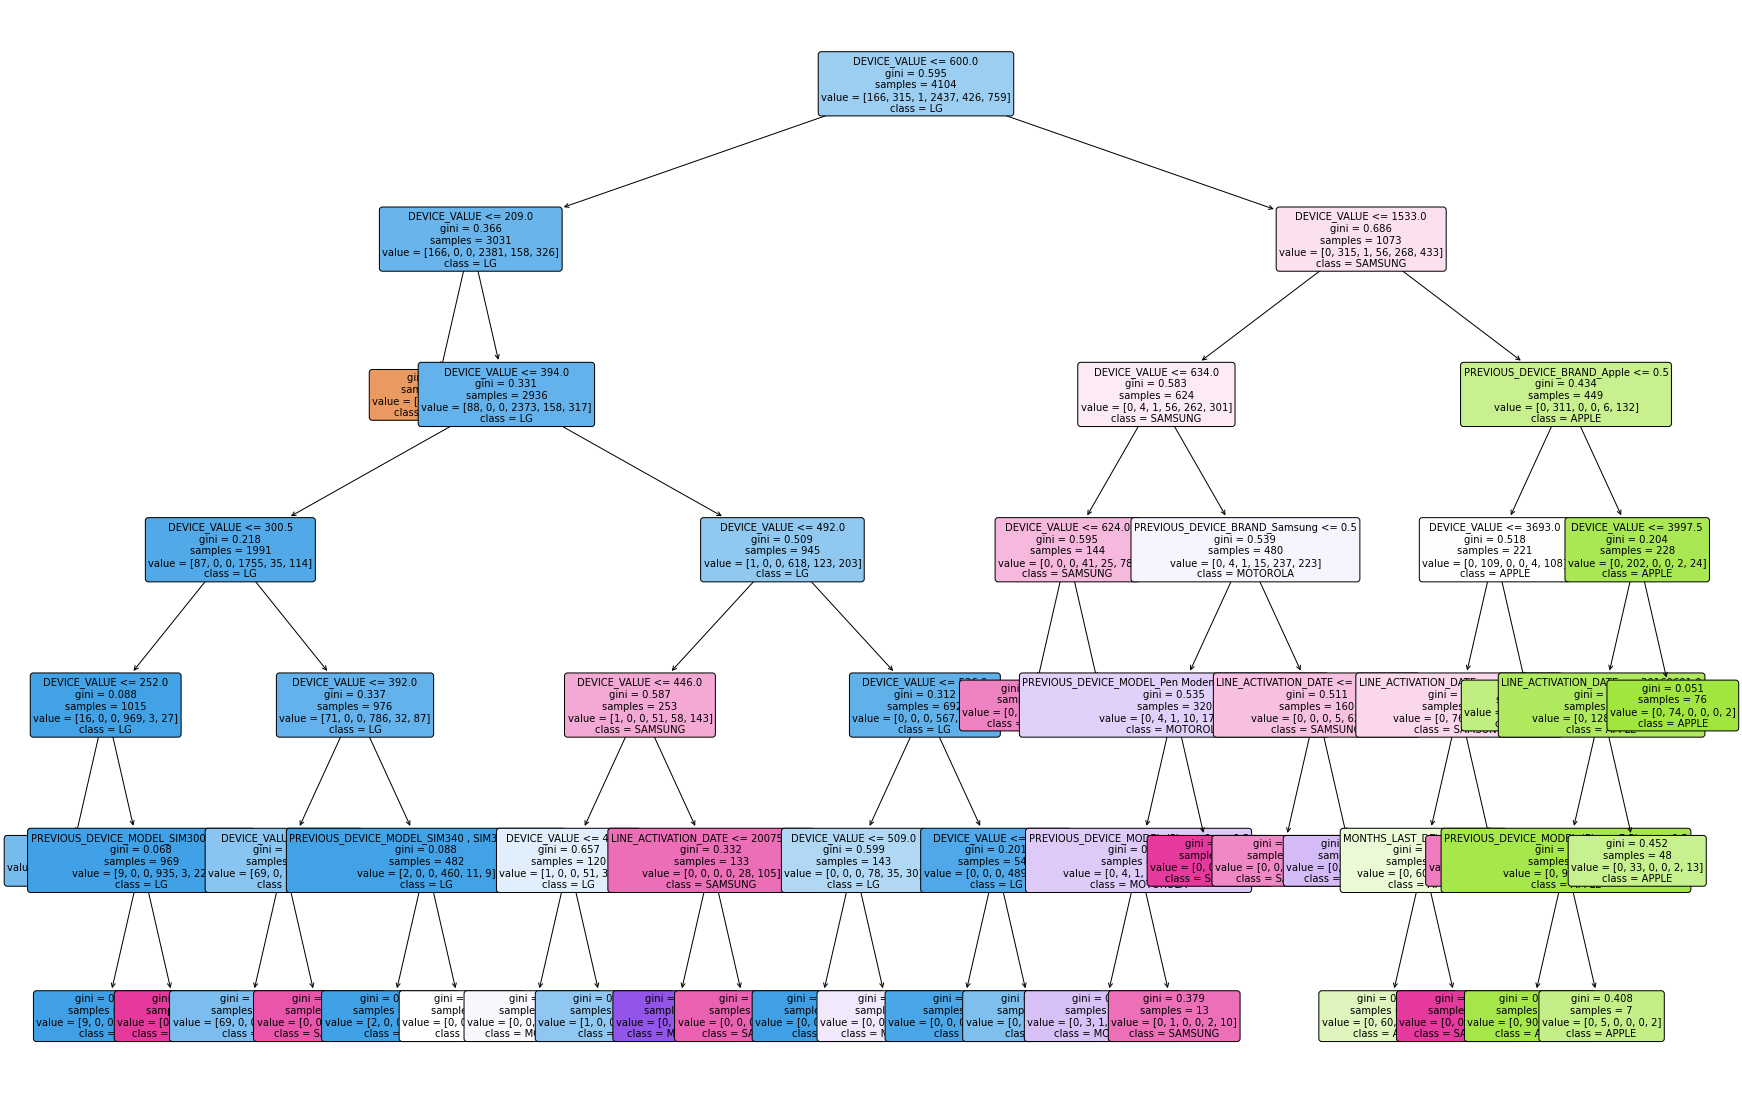

In [43]:
plt.figure(figsize=(30, 20))
tree.plot_tree(clf, feature_names=X.columns, class_names=[str(i) for i in clf.classes_], fontsize = 10,filled=True, rounded=True)
plt.show()

<font size="+1" color="#003300">I hereby declare that, except for the code provided by the course instructors, all of my code, report, and figures were produced by myself.</font>